In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
diabetes=pd.read_csv("D:\datasets\diabetes.csv")
dataframe=diabetes

In [3]:
dataframe.shape

(768, 9)

In [4]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(dataframe.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [6]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
numericVar = dataframe.columns[:-1]

In [9]:
for itr in numericVar:
    count=0
    for jtr in dataframe[itr]:
        if(jtr==0.0):
            count+=1
    
    print("Zero values in {} are {}".format(itr,count))

Zero values in Pregnancies are 111
Zero values in Glucose are 5
Zero values in BloodPressure are 35
Zero values in SkinThickness are 227
Zero values in Insulin are 374
Zero values in BMI are 11
Zero values in DiabetesPedigreeFunction are 0
Zero values in Age are 0


In [10]:
for itr in numericVar:
    dataframe[itr]=dataframe[itr].replace(0,np.NaN)
    med=int(dataframe[itr].median(skipna=True))
    dataframe[itr]=dataframe[itr].replace(np.NaN,med)

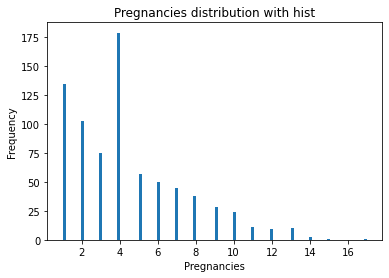

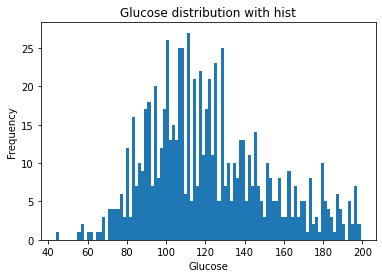

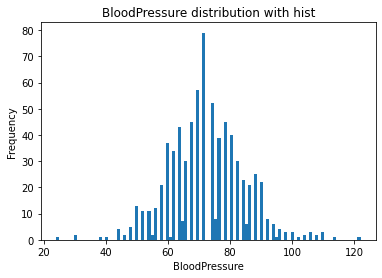

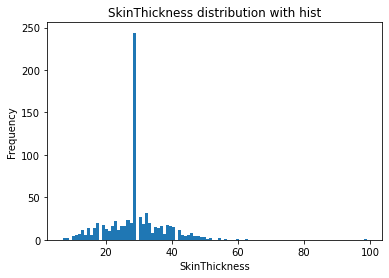

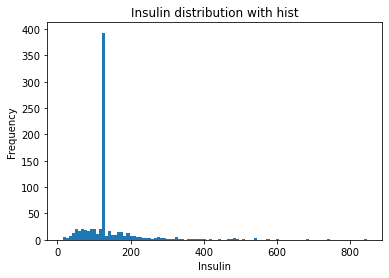

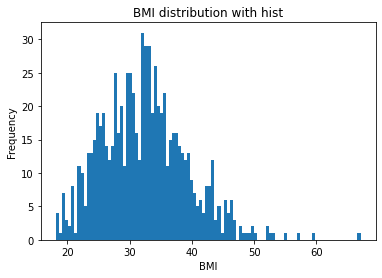

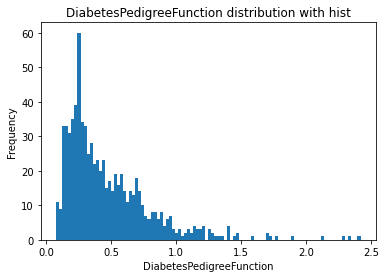

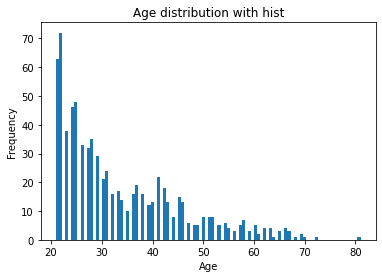

In [11]:
for itr in numericVar:
    plt.hist(dataframe[itr], bins = 100)
    plt.xlabel(itr)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(itr))
    plt.show()

In [12]:
x=dataframe.drop('Outcome',axis=1)
y=dataframe['Outcome']


In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

In [137]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# knn algorithm


## sk learn

In [138]:
k=int(math.sqrt(len(y_test)))
if (k%2==0):
    k+=1
print(k)

13


In [139]:
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [140]:
ypred_knn_sk=model.predict(x_test)

In [141]:
confusion_matrix(y_test,ypred_knn_sk)

array([[106,  15],
       [ 32,  39]], dtype=int64)

In [142]:
knn_sk_accu=accuracy_score(y_test,ypred_knn_sk)

In [143]:
knn_sk_accu=(knn_sk_accu*100)
print(knn_sk_accu)

75.52083333333334


In [144]:
print(classification_report(y_test,ypred_knn_sk))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       121
           1       0.72      0.55      0.62        71

    accuracy                           0.76       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



## self implementation


In [145]:
def euc_dis(x,y):
    return (math.pow(abs(x-y),2))

In [146]:
def knn_algo(x_train,y_train,curr,k):
    k_dis=[]
    count_pos=0
    count_neg=0
    #size=curr.shape[0]
    #print(y_train)
    for (i,j) in zip(x_train,y_train):
        dis=0
        for it in range(len(i)):
            dis+=euc_dis(i[it],curr[it])
        
        dis=math.sqrt(dis)
        k_dis.append((dis,j))
    k_dis=sorted(k_dis)
    for i in range(k):
        if(k_dis[i][1]==0):
            count_neg+=1
        else:
            count_pos+=1
    if(count_pos>count_neg):
        return 1
    else:
        return 0

In [147]:
y_pred_self=[]
for i in range(len(x_test)):
    diabetes_pred=knn_algo(x_train,y_train,x_test[i],21)
    y_pred_self.append(diabetes_pred)

In [148]:
print(y_pred_self)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


In [149]:
y_pred_self_accu=accuracy_score(y_test,y_pred_self)

In [150]:
y_pred_self_accu=(y_pred_self_accu*100)
print(y_pred_self_accu)

78.64583333333334


In [151]:
confusion_matrix(y_test,y_pred_self)

array([[111,  10],
       [ 31,  40]], dtype=int64)

In [152]:
print(classification_report(y_test,y_pred_self))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       121
           1       0.80      0.56      0.66        71

    accuracy                           0.79       192
   macro avg       0.79      0.74      0.75       192
weighted avg       0.79      0.79      0.78       192



# logistic regression


Logistic Regression works on the basis of Gradient descent.
Gradient descent is an iterative optimization algorithm for finding the local minimum of a function.

To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point. If we take steps proportional to the positive of the gradient (moving towards the gradient), we will approach a local maximum of the function, and the procedure is called Gradient Ascent.

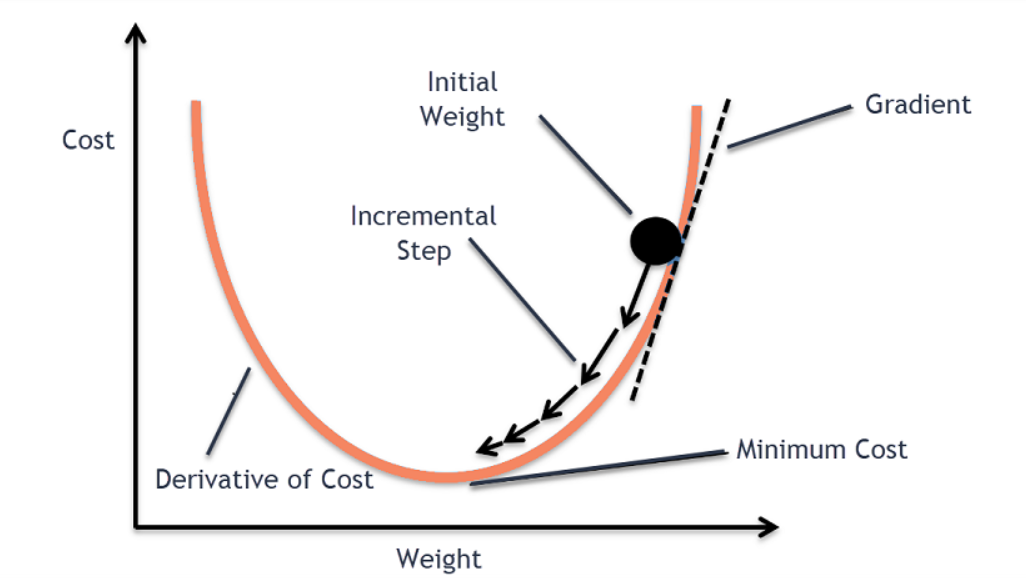

In [153]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
y_pred_log_reg = model.predict(x_test)

In [154]:
y_pred_log_reg_accu=accuracy_score(y_test,y_pred_log_reg)

In [155]:
y_pred_log_reg_accu=y_pred_log_reg_accu*100
print(y_pred_log_reg_accu)

77.08333333333334


In [156]:
confusion_matrix(y_test,y_pred_log_reg)

array([[107,  14],
       [ 30,  41]], dtype=int64)

In [157]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       121
           1       0.75      0.58      0.65        71

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



# COMPARISON BETWEEN ALGORITHMS

In [158]:
data = {'KNN':knn_sk_accu, 'KNN_SELF':y_pred_self_accu, 'LOGISTIC ':y_pred_log_reg_accu}

In [159]:
algorithms = list(data.keys())
accuracy = list(data.values())
  

 

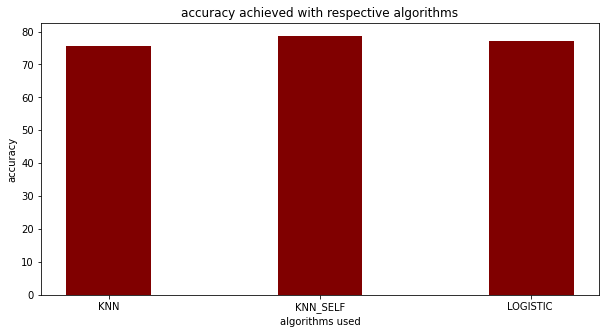

In [160]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithms, accuracy, color ='maroon',width = 0.4)
plt.xlabel("algorithms used")
plt.ylabel("accuracy")
plt.title("accuracy achieved with respective algorithms")
plt.show()

In [161]:
print(data)

{'KNN': 75.52083333333334, 'KNN_SELF': 78.64583333333334, 'LOGISTIC ': 77.08333333333334}
